In [1]:
# Import libraries and load dataset
import os
import sys
import importlib
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

import common.common as common
importlib.reload(common)

df = pd.read_csv("Data.csv")

yr = list(df.yr)
df = df.set_index("yr")
df["yr"] = yr
df

,inbtou_volume,inbtou_volume_ov,inbtou_volume_sd,inbtou_spending,inbtou_spending_travel,inbtou_spending_transport,covid19_cases,covid19_deaths,covid19_mortality,yr
yr,,,,,,,,,,
2010,754650.0,334650.0,420000.0,438000000.0,385000000.0,53000000.0,0,0,0.000000,2010
2011,826280.0,379280.0,447000.0,540000000.0,453000000.0,87000000.0,0,0,0.000000,2011
2012,892760.0,405760.0,487000.0,676000000.0,543000000.0,133000000.0,0,0,0.000000,2012
2013,1052150.0,422150.0,630000.0,778000000.0,583000000.0,195000000.0,0,0,0.000000,2013
2014,1104100.0,427100.0,677000.0,820000000.0,635000000.0,185000000.0,0,0,0.000000,2014
2015,1071540.0,467540.0,604000.0,712000000.0,607000000.0,105000000.0,0,0,0.000000,2015
2016,943360.0,441360.0,502000.0,644000000.0,573000000.0,71000000.0,0,0,0.000000,2016
2017,1057840.0,398840.0,659000.0,572000000.0,551000000.0,21000000.0,0,0,0.000000,2017
2018,1209700.0,431700.0,778000.0,604000000.0,593000000.0,11000000.0,0,0,0.000000,2018


Estimated COVID-19 effect: -851062 ± 103959 (95% confidence)


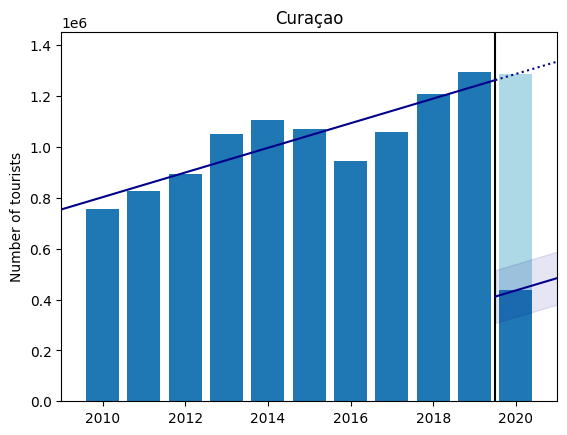

                            OLS Regression Results                            
Dep. Variable:      log_inbtou_volume   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     55.82
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           2.00e-05
Time:                        15:00:25   Log-Likelihood:                 13.083
No. Observations:                  11   AIC:                            -20.17
Df Residuals:                       8   BIC:                            -18.97
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -83.8905     19.157     -4.379

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [2]:
# Set up plot
plt.title('Curaçao')
plt.ylabel('Number of tourists')
plt.xlim(2009, 2021)
y_name = 'inbtou_volume'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)

Estimated COVID-19 effect: -258063 ± 33675 (95% confidence)


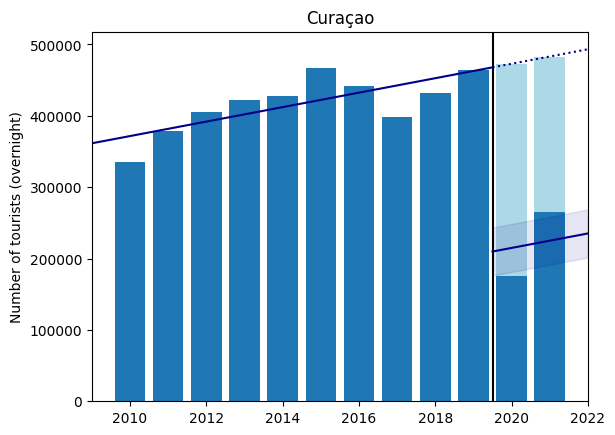

                             OLS Regression Results                             
Dep. Variable:     log_inbtou_volume_ov   R-squared:                       0.954
Model:                              OLS   Adj. R-squared:                  0.936
Method:                   Least Squares   F-statistic:                     54.93
Date:                  Wed, 26 Apr 2023   Prob (F-statistic):           1.11e-05
Time:                          15:01:07   Log-Likelihood:                 16.977
No. Observations:                    12   AIC:                            -25.95
Df Residuals:                         8   BIC:                            -24.01
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercep

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [4]:
# Set up plot
plt.title('Curaçao')
plt.ylabel('Number of tourists (overnight)')
plt.xlim(2009, 2022)
y_name = 'inbtou_volume_ov'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)

Estimated COVID-19 effect: -555666 ± 94163 (95% confidence)


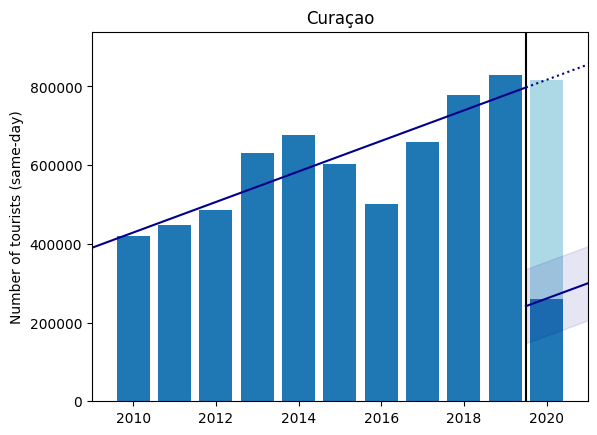

                             OLS Regression Results                             
Dep. Variable:     log_inbtou_volume_sd   R-squared:                       0.875
Model:                              OLS   Adj. R-squared:                  0.844
Method:                   Least Squares   F-statistic:                     28.02
Date:                  Wed, 26 Apr 2023   Prob (F-statistic):           0.000244
Time:                          15:01:40   Log-Likelihood:                 8.5675
No. Observations:                    11   AIC:                            -11.14
Df Residuals:                         8   BIC:                            -9.941
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -117.5428  

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [5]:
# Set up plot
plt.title('Curaçao')
plt.ylabel('Number of tourists (same-day)')
plt.xlim(2009, 2021)
y_name = 'inbtou_volume_sd'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)

Estimated COVID-19 effect: -350578313 ± 118330874 (95% confidence)


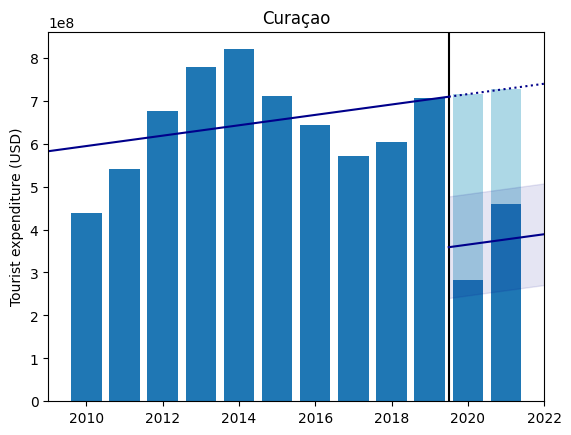

                             OLS Regression Results                            
Dep. Variable:     log_inbtou_spending   R-squared:                       0.720
Model:                             OLS   Adj. R-squared:                  0.615
Method:                  Least Squares   F-statistic:                     6.867
Date:                 Wed, 26 Apr 2023   Prob (F-statistic):             0.0133
Time:                         15:04:03   Log-Likelihood:                 5.6428
No. Observations:                   12   AIC:                            -3.286
Df Residuals:                        8   BIC:                            -1.346
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept         

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [8]:
# Set up plot
plt.title('Curaçao')
plt.ylabel('Tourist expenditure (USD)')
plt.xlim(2009, 2022)
y_name = 'inbtou_spending'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)

Estimated COVID-19 effect: -337250602 ± 67822006 (95% confidence)


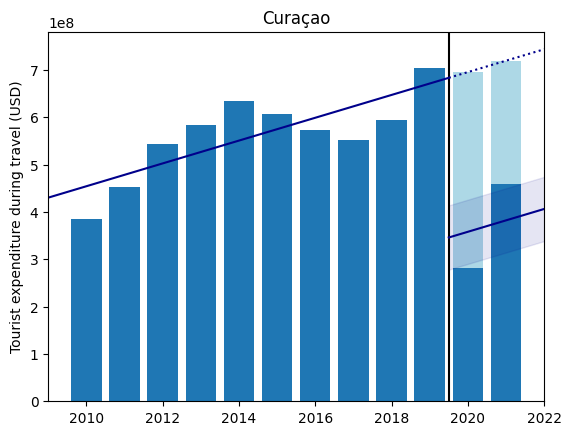

                                OLS Regression Results                                
Dep. Variable:     log_inbtou_spending_travel   R-squared:                       0.851
Model:                                    OLS   Adj. R-squared:                  0.795
Method:                         Least Squares   F-statistic:                     15.23
Date:                        Wed, 26 Apr 2023   Prob (F-statistic):            0.00114
Time:                                15:02:07   Log-Likelihood:                 11.419
No. Observations:                          12   AIC:                            -14.84
Df Residuals:                               8   BIC:                            -12.90
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [7]:
# Set up plot
plt.title('Curaçao')
plt.ylabel('Tourist expenditure during travel (USD)')
plt.xlim(2009, 2022)
y_name = 'inbtou_spending_travel'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)

Estimated COVID-19 effect: -13327710 ± 59021196 (95% confidence)


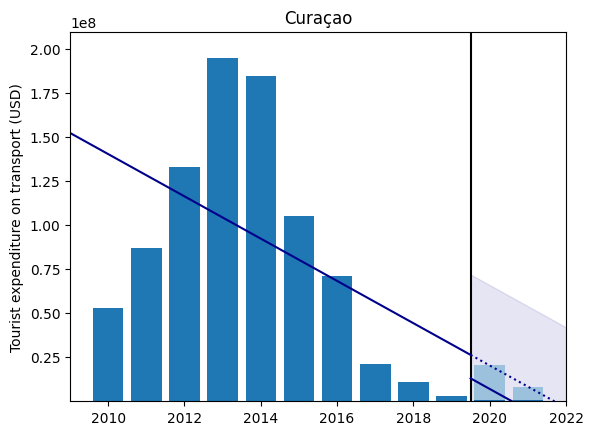

                                  OLS Regression Results                                 
Dep. Variable:     log_inbtou_spending_transport   R-squared:                       0.813
Model:                                       OLS   Adj. R-squared:                  0.742
Method:                            Least Squares   F-statistic:                     11.56
Date:                           Wed, 26 Apr 2023   Prob (F-statistic):            0.00280
Time:                                   15:06:20   Log-Likelihood:                -14.521
No. Observations:                             12   AIC:                             37.04
Df Residuals:                                  8   BIC:                             38.98
Df Model:                                      3                                         
Covariance Type:                       nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
---------

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [12]:
# Set up plot
plt.title('Curaçao')
plt.ylabel('Tourist expenditure on transport (USD)')
plt.xlim(2009, 2022)
plt.ylim(1, 2.1 * 10**8)
y_name = 'inbtou_spending_transport'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)